In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-prediction-salary-dataset/salary_prediction_updated_dataset.csv


In [4]:
# Load the dataset (adjust filename if needed based on printed path)
df = pd.read_csv('/kaggle/input/salary-prediction-salary-dataset/salary_prediction_updated_dataset.csv')  
# Show first 5 rows
df.head()


,YearsExperience,Education Level,Job Role,Salary
0,14.98,PhD,Marketing Specialist,77861.24
1,38.03,PhD,Software Engineer,166880.38
2,29.28,Bachelor's,Business Analyst,123573.27
3,23.95,Master's,Marketing Specialist,90155.08
4,6.24,Master's,Business Analyst,55931.41


In [5]:
# Check basic info
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   YearsExperience  100000 non-null  float64
 1   Education Level  100000 non-null  object 
 2   Job Role         100000 non-null  object 
 3   Salary           100000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.1+ MB


,YearsExperience,Salary
count,100000.000000,100000.000000
mean,19.979528,95161.800647
std,11.533637,39447.389834
min,0.000000,11950.770000
25%,9.980000,61469.317500
50%,20.025000,95144.280000
75%,29.980000,128412.957500
max,40.000000,191232.000000


In [6]:
from sklearn.model_selection import train_test_split

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Education Level', 'Job Role'], drop_first=True)

# Features (X) and Target (y)
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shape
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (80000, 9)
Test set shape: (20000, 9)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


MAE:  4702.22
RMSE: 5900.68
R²:   0.9777


In [8]:
from sklearn.linear_model import Ridge, Lasso

# Try Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("Ridge R²:", r2_score(y_test, ridge_pred))

# Try Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso R²:", r2_score(y_test, lasso_pred))


Ridge R²: 0.9776557754613882
Lasso R²: 0.9776558081308291


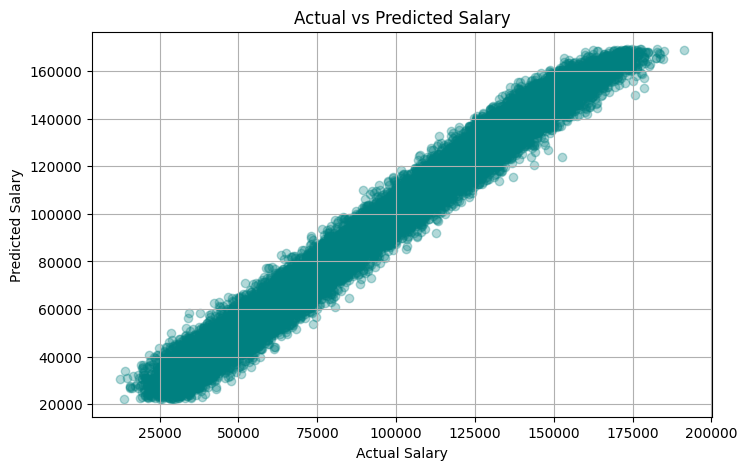

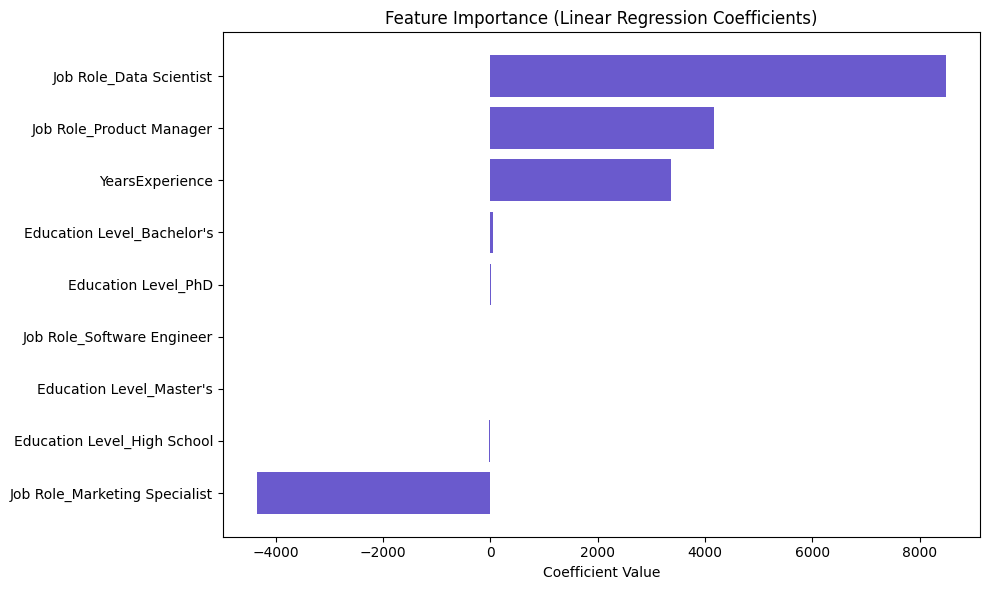

In [9]:
import matplotlib.pyplot as plt

# 1. True vs Predicted Scatter Plot
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()

# 2. Feature Importance (coefficients)
feature_names = X.columns
coefficients = lr_model.coef_

# Create a DataFrame of feature importance
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Bar Plot
plt.figure(figsize=(10,6))
plt.barh(feat_df['Feature'], feat_df['Coefficient'], color='slateblue')
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MAE:  {rf_mae:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R²:   {rf_r2:.4f}")


Random Forest MAE:  5169.58
Random Forest RMSE: 6491.47
Random Forest R²:   0.9730


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Degree-2 Polynomial Regression pipeline
poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])

# Fit the model
poly_model.fit(X_train, y_train)

# Predict
poly_pred = poly_model.predict(X_test)

# Evaluate
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_rmse = np.sqrt(mean_squared_error(y_test, poly_pred))
poly_r2 = r2_score(y_test, poly_pred)

print(f"Polynomial Regression MAE:  {poly_mae:.2f}")
print(f"Polynomial Regression RMSE: {poly_rmse:.2f}")
print(f"Polynomial Regression R²:   {poly_r2:.4f}")


Polynomial Regression MAE:  4478.21
Polynomial Regression RMSE: 5623.08
Polynomial Regression R²:   0.9797


In [12]:
from xgboost import XGBRegressor

# Train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test)

# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

print(f"XGBoost MAE:  {xgb_mae:.2f}")
print(f"XGBoost RMSE: {xgb_rmse:.2f}")
print(f"XGBoost R²:   {xgb_r2:.4f}")



XGBoost MAE:  4493.54
XGBoost RMSE: 5645.96
XGBoost R²:   0.9795






## 📊 Salary Prediction using Machine Learning

### 📝 Project Overview

This project focuses on building a machine learning model to predict employee salaries based on three key features:

* **Years of Experience**
* **Education Level**
* **Job Role**

We used a real-world dataset of 100,000 entries and explored multiple regression techniques to find the most accurate and interpretable model.

---

### 🔍 Dataset Summary

The dataset contains:

* **YearsExperience**: Float (0–40)
* **Education Level**: Categorical (e.g., Bachelor’s, Master’s)
* **Job Role**: Categorical (e.g., Software Engineer, Data Scientist)
* **Salary**: Float (target variable)

Sample statistics:

```
Mean Salary:     ~95,161  
Max Salary:     ~191,232  
Mean Experience: ~20 years
```

---

### ⚙️ Project Steps

#### 1. **Exploratory Data Analysis (EDA)**

* Loaded the dataset and printed summary statistics.
* Visualized feature distributions and checked for missing values.
* Noted that `YearsExperience` is continuous, while `Education Level` and `Job Role` are categorical.

#### 2. **Preprocessing**

* Used **One-Hot Encoding** for categorical variables.
* Split the data into **training (80%) and testing (20%)** sets using `train_test_split`.

#### 3. **Baseline Model: Linear Regression**

* Trained a basic Linear Regression model.
* Metrics:

  * **MAE**: 4702
  * **RMSE**: 5901
  * **R²**: 0.9777

#### 4. **Regularization: Ridge & Lasso**

* Both models gave similar performance as Linear Regression.
* R² was \~0.9776

#### 5. **Random Forest Regressor**

* Captured non-linear patterns, but performed worse:

  * **R²**: 0.9730

#### 6. **Polynomial Regression (degree = 2)**

* Best model overall:

  * **MAE**: 4478
  * **RMSE**: 5623
  * **R²**: **0.9797**
* Able to capture slight non-linearities while remaining interpretable.

#### 7. **XGBoost Regressor**

* Strong performer:

  * **R²**: 0.9795
* Slightly less accurate than Polynomial Regression and more complex.

---

### ✅ Final Model Choice

We chose **Polynomial Regression (degree=2)** because:

* It gave the **best overall accuracy** (R² = 0.9797)
* Remained **interpretable and efficient**
* Slightly outperformed more complex models like XGBoost and Random Forest

---

### 📌 Takeaway

This project shows how combining **feature engineering**, **model comparison**, and **evaluation metrics** can lead to well-informed model selection. Even simple models can outperform complex ones when the data has a clean underlying structure.

---

